In [15]:
# data organization libraries
import numpy as np
import pandas as pd

# data visualization libraries
import plotly.express as px
import matplotlib.pyplot as plt

# modeling libraries
import sklearn as sk


In [16]:
# get raw data

fire_df = pd.read_csv('clean_fires.csv')

fire_df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [17]:
len(fire_df)

512

In [18]:
mons = fire_df['month'].value_counts()

In [19]:
mons.index

Int64Index([8, 9, 3, 7, 2, 6, 10, 12, 4], dtype='int64')

In [20]:
aug_fires = fire_df[fire_df['month'] == 8]

aug_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
5,8,6,8,0,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
12,6,5,8,5,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.0
23,7,4,8,6,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.0


In [21]:
len(aug_fires)

184

In [22]:
samp = aug_fires.sample(n=60)

samp.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
178,8,6,8,2,88.8,147.3,614.5,9.0,14.4,66,5.4,0.0,5.23
454,1,4,8,3,91.7,191.4,635.9,7.8,19.9,50,4.0,0.0,82.75
82,1,2,8,2,94.8,108.3,647.1,17.0,18.6,51,4.5,0.0,0.00
447,4,5,8,3,95.2,217.7,690.0,18.0,23.4,49,5.4,0.0,6.43
381,8,4,8,6,91.6,273.8,819.1,7.7,21.3,44,4.5,0.0,12.18


In [23]:
len(samp)

60

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

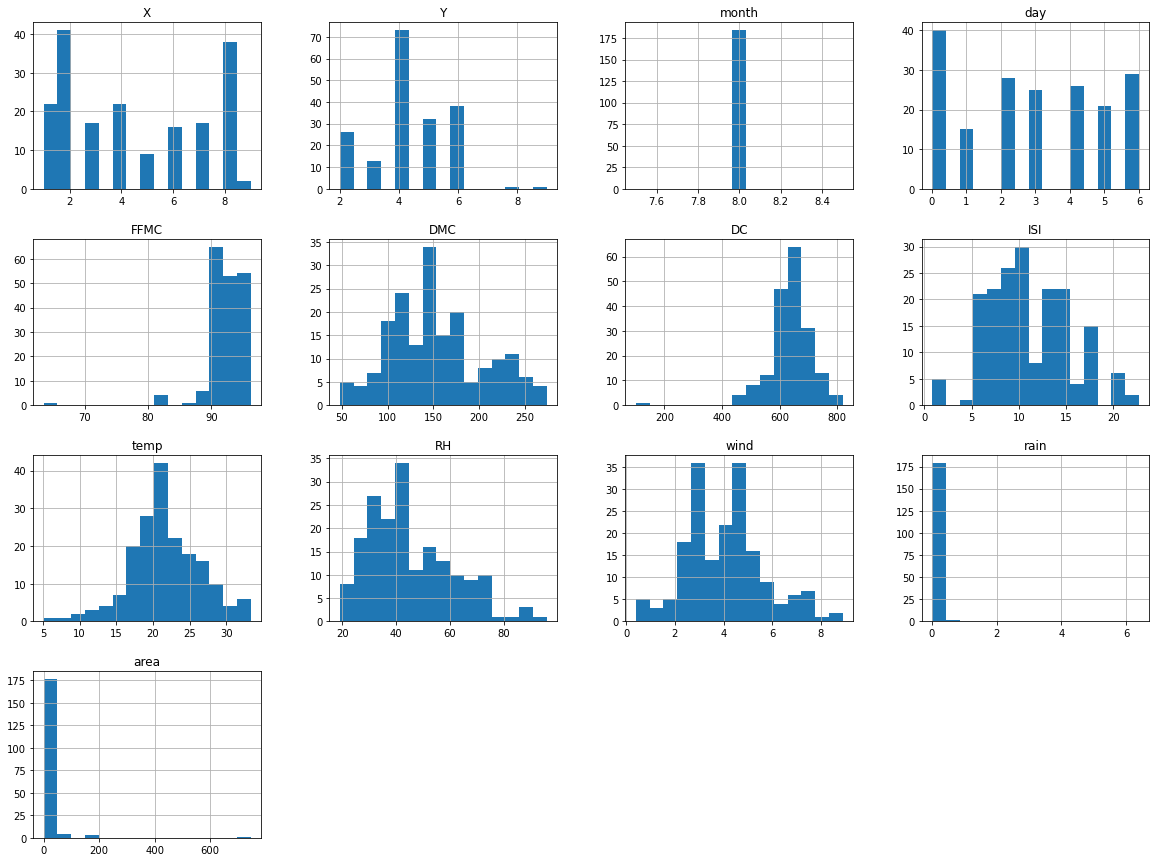

In [24]:
aug_fires.hist(bins=15, figsize=(20,15))

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

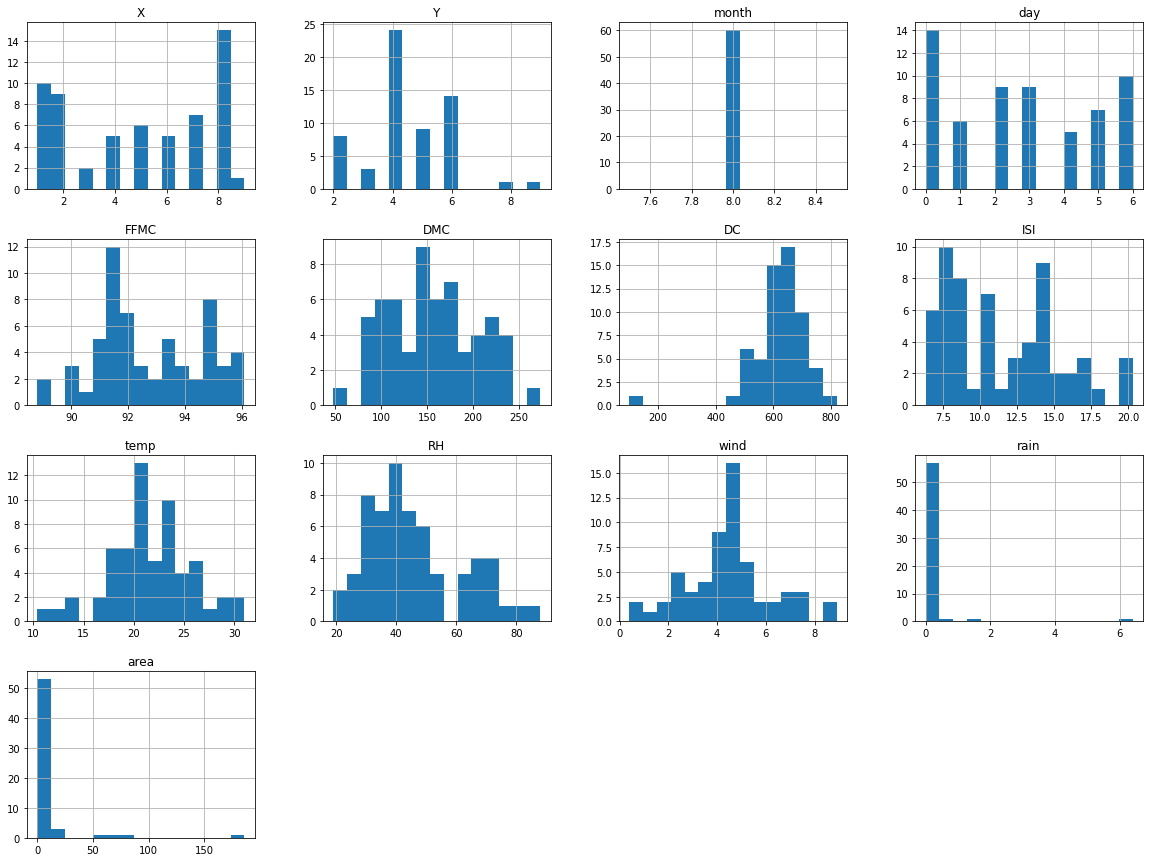

In [25]:
samp.hist(bins=15, figsize=(20,15))

In [26]:
def generate_month_sample(df, month, num_samples):
    
    month_df = df[df['month'] == month]
    
    return month_df.sample(n=num_samples)


In [27]:
dex_list = mons.index

sample_list = [61, 57, 18, 11, 7, 6, 5, 3, 3]



In [37]:
def generate_year_sample(df, num_sample_list, index_list):
    
    final_df = pd.DataFrame()
    
    
    
    for i in range(1,10):
        
        if i == 1:
            
            final_df = generate_month_sample(df, i, num_sample_list[i-1])
        else:
            
            final_df = pd.concat([final_df, generate_month_sample(df, i, num_sample_list[i])])
    
    return final_df
        
        

In [38]:
one_yr = generate_year_sample(fire_df, sample_list, dex_list)

one_yr.head()

ValueError: a must be greater than 0 unless no samples are taken